lab 13 class task


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4613 - loss: 0.7367 - val_accuracy: 0.6504 - val_loss: 0.6784
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6982 - loss: 0.6231 - val_accuracy: 0.6748 - val_loss: 0.6322
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7558 - loss: 0.5543 - val_accuracy: 0.6667 - val_loss: 0.5954
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7431 - loss: 0.5370 - val_accuracy: 0.6911 - val_loss: 0.5612
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7603 - loss: 0.5167 - val_accuracy: 0.7073 - val_loss: 0.5436
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7790 - loss: 0.5077 - val_accuracy: 0.7154 - val_loss: 0.5224
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7720 - loss: 0.4724 - val_accuracy: 0.7154 - val_loss: 0.5117
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7693 - loss: 0.4618 - val_accuracy: 0.7236 - val_loss: 0.

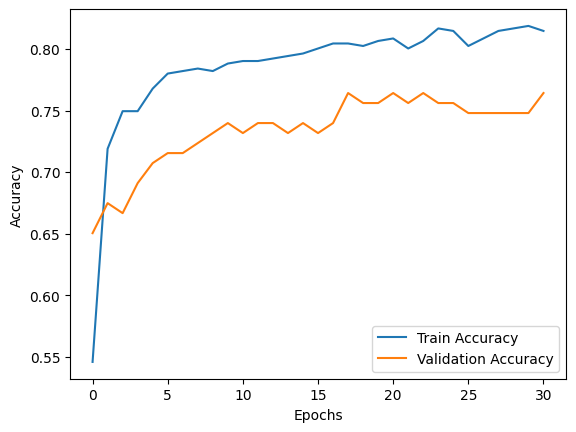

In [1]:
#class Task 1

# Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
# Load dataset
df = pd.read_csv('/content/diabetes.csv')
df.head()
# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build ANN model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')])
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True)
 #Train model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100,
batch_size=16,
                    callbacks=[early_stopping], verbose=1)
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")
# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


433/433 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 424693989376.0000 - mae: 540145.1875 - val_loss: 396438634496.0000 - val_mae: 533442.6875
Epoch 2/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 434194710528.0000 - mae: 542027.0625 - val_loss: 386133098496.0000 - val_mae: 525306.1875
Epoch 3/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 407892393984.0000 - mae: 526565.8750 - val_loss: 360971829248.0000 - val_mae: 504892.6562
Epoch 4/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 376709349376.0000 - mae: 497444.0000 - val_loss: 320944013312.0000 - val_mae: 470332.1875
Epoch 5/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 339847118848.0000 - mae: 465675.2500 - val_loss: 270775746560.0000 - val_mae: 422474.7500
Epoch 6/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 288706854912.0000 - mae: 414413.0625 - val_loss: 217302040576.0000 - val_mae: 364552.2188
Epoch 7/100
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 227713531904.0000 - mae: 355646.5000 - val_lo

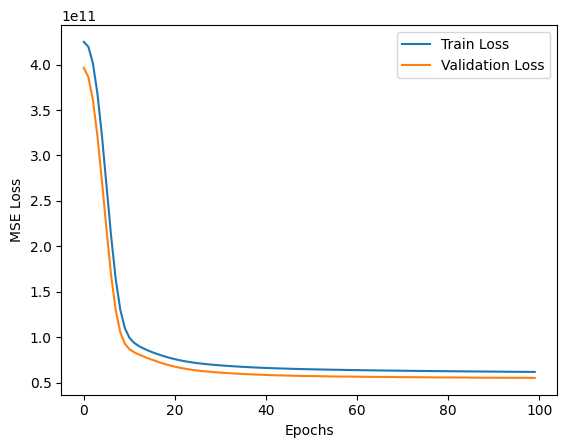

In [2]:
#class task 2
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
# Load dataset
df = pd.read_csv('/content/kc_house_data.csv')
df.head()
# Features and target
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors']]
y = df['price']
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1)
])
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error',
metrics=['mae'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10,
restore_best_weights=True)
# Train model
history = model.fit(X_train, y_train, validation_split=0.2,
epochs=100, callbacks=[early_stopping], verbose=1)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae:.2f}")

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()


lab 13 home task

Dataset Preview:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


224/224 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6467 - loss: 0.6392 - val_accuracy: 0.7968 - val_loss: 0.4605
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7864 - loss: 0.4651 - val_accuracy: 0.8135 - val_loss: 0.4364
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8124 - loss: 0.4250 - val_accuracy: 0.8186 - val_loss: 0.4297
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8173 - loss: 0.4141 - val_accuracy: 0.8186 - val_loss: 0.4241
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8166 - loss: 0.4171 - val_accuracy: 0.8208 - val_loss: 0.4216
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8174 - loss: 0.4034 - val_accuracy: 0.8214 - val_loss: 0.4207
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8204 - loss: 0.4001 - val_accuracy: 0.8208 - val_loss: 0.4193
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8252 - loss: 0.3857 - val_accuracy: 0.8186 - val_

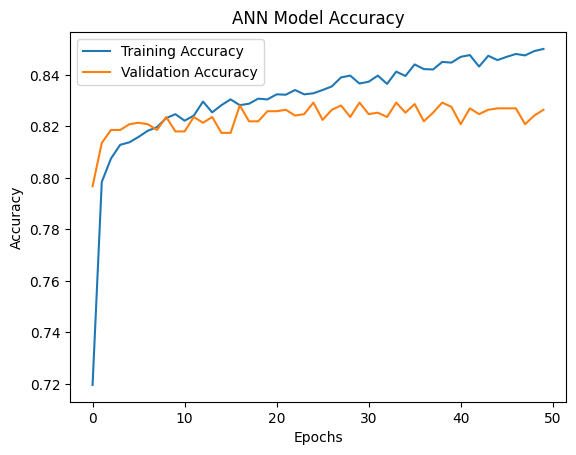

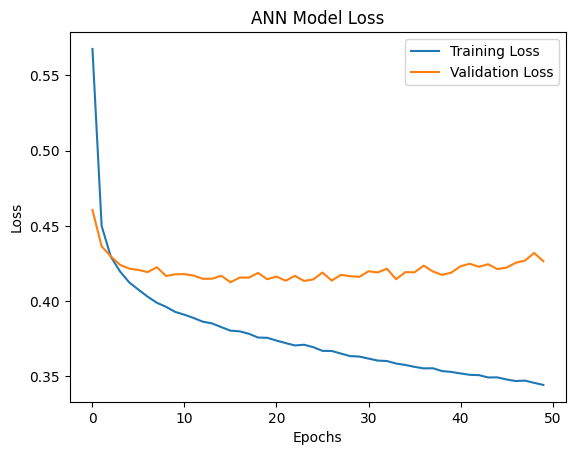

In [5]:
#home task 1
# =====================================================
# Customer Subscription Prediction using ANN
# Dataset: bank.csv
# =====================================================

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Load Dataset (NO UPLOAD FUNCTION)
df = pd.read_csv("/content/bank.csv")
print("Dataset Preview:")
print(df.head())

# 3. Encode Categorical Columns
categorical_columns = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'poutcome', 'deposit'
]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 4. Split Features and Target
X = df.drop('deposit', axis=1)
y = df['deposit']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Build ANN Model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8. Train ANN Model (SAVE HISTORY FOR GRAPH)
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 9. Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 10. Plot Training Accuracy & Loss Graphs

# Accuracy Graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

# Loss Graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()




Dataset Preview:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 281960032.0000 - mae: 12490.2334 - val_loss: 310333792.0000 - val_mae: 12654.4189
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 313007552.0000 - mae: 13333.5361 - val_loss: 310272608.0000 - val_mae: 12652.4023
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 290904736.0000 - mae: 12829.1787 - val_loss: 310149088.0000 - val_mae: 12648.4941
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 328629856.0000 - mae: 13584.3916 - val_loss: 309921376.0000 - val_mae: 12641.5889
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 297397056.0000 - mae: 12922.1133 - val_loss: 309541888.0000 - val_mae: 12630.5039
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 317347296.0000 - mae: 13388.2930 - val_loss: 308939776.0000 - val_mae: 12613.4805
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 346366560.0000 - mae: 13915.8340 - val_loss: 308072864.0000 - val_mae: 12589.6191
Epoch 8/100
27/27 ━━━━━

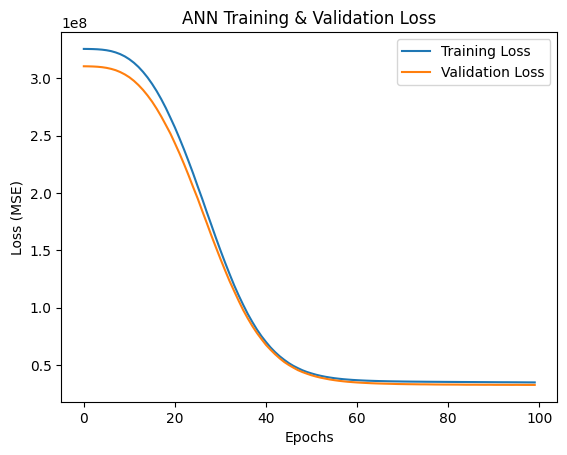

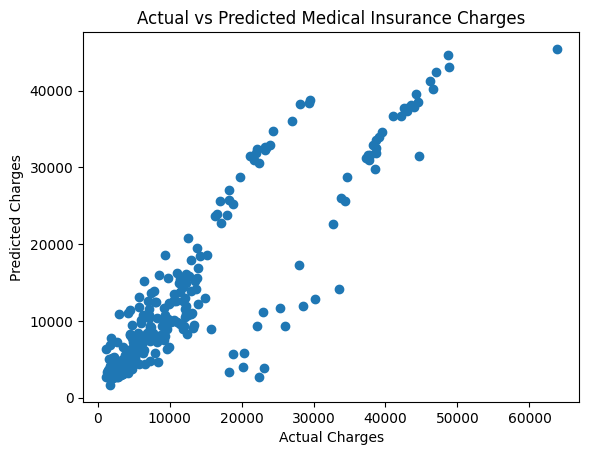

In [6]:
#home task2

# =====================================================
# Medical Insurance Cost Prediction using ANN (Regression)
# Dataset: insurance.csv
# =====================================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. Load Dataset
df = pd.read_csv("/content/insurance.csv")
print("Dataset Preview:")
print(df.head())

# 3. Encode Categorical Columns
categorical_columns = ['sex', 'smoker', 'region']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 4. Split Features and Target
X = df.drop('charges', axis=1)
y = df['charges']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 7. Build ANN Regression Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Linear output for regression

model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

# 8. Train Model
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 9. Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# 10. Plot Training & Validation Loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ANN Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

# 11. Actual vs Predicted Charges Graph
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Insurance Charges")
plt.show()
